In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
data_path = "path.csv"

In [46]:
import DataLoader, Machine_Model, Engine
import torch

train_percent = 0.8
val_percent = 0.1
random_state = 42
batch_size = 100

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     random_state=random_state, batch_size=batch_size)
train, val, test = dataloader.fit()

if len(train) == 0 or len(val) == 0 or len(test) == 0:
    raise "Data with zero item. Not working. Change the sequence or the batch size."

INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 128
OUTPUT_SIZE = 1

model0 = Machine_Model.RNN_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False)


1 1 1


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.435684 Accuracy -13.0904 | validation: Loss 0.307923 Accuracy -29.0311
Epoch 1 | train: Loss 0.371185 Accuracy -11.0045 | validation: Loss 0.252801 Accuracy -23.6551
Epoch 2 | train: Loss 0.311617 Accuracy -9.0780 | validation: Loss 0.202569 Accuracy -18.7561
Epoch 3 | train: Loss 0.256973 Accuracy -7.3108 | validation: Loss 0.157324 Accuracy -14.3435
Epoch 4 | train: Loss 0.207354 Accuracy -5.7060 | validation: Loss 0.117286 Accuracy -10.4387
Epoch 5 | train: Loss 0.162985 Accuracy -4.2711 | validation: Loss 0.082803 Accuracy -7.0756
Epoch 6 | train: Loss 0.124230 Accuracy -3.0177 | validation: Loss 0.054326 Accuracy -4.2983
Epoch 7 | train: Loss 0.091559 Accuracy -1.9611 | validation: Loss 0.032360 Accuracy -2.1560
Epoch 8 | train: Loss 0.065505 Accuracy -1.1185 | validation: Loss 0.017360 Accuracy -0.6931
Epoch 9 | train: Loss 0.046562 Accuracy -0.5059 | validation: Loss 0.009570 Accuracy 0.0666
Epoch 10 | train: Loss 0.035030 Accuracy -0.1329 | validation: L

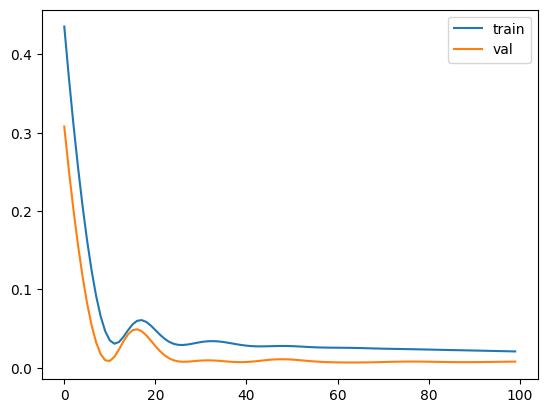

In [47]:
engine.plot_loss()
engine.plot_acc()

In [34]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


0.9942651575594049